<B>Who: </B> 
<br>City and Local Governments</br>

<br><B>Description:</B> </br>
<br>To encourage bike usage, cities across world have rolled out Bike Sharing program that hosts data ranging from travel time, start & end location, weather, traffic, demographics of riders and so on. The Capital Bike Sharing dataset contains information relaed to one such bike sharing program and is useful for different reasearch areas.</br>

<br><B>Question asked: </B></br> 
<br>Can we predict bike rental demand for bike sharing program</br>

<br><B>Type of ML problem: </B> </br>
<br>Classification or regression. It is likely regression problem for we are assessing volume or count of bike rented for a given duration and count may be a continuous range of numbers. </br>

<br><B>Input: </B> </br>
<br>instant	dteday	season	yr	mnth	hr	holiday	weekday	workingday	weathersit	temp	atemp	hum	windspeed	casual	registered	cnt</br>

<br><B>Features: </B></br>
<br>season, hr, travel time, start & end location, weather, traffic, casual, registered</br>

<br><B>Output: </B></br> 
<br>Count of total rental bikes including both casual and registered</br>

<br><B>Data collection: </B> </br>
<br>Data is donated to the UCI ML Repository https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset</br>

<br><B>How predictions are used: </B></br> 
<br>We apply the model to make predictions to identify which data features influence bike renting during a day.</br>

<br><B>A Dive into the data set:</B></br> 

<br>In terms of cleaning and wrangling, I need to see the distribution of each column and identify how many rows have missing data. This is called Exploratory Data Analysis step.

<h1> Exploratory Data Analysis

In [3]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Importing the dataset
stats = pd.read_csv('hour.csv')

In [32]:
#Shape of dataset
stats.shape

(17379, 17)

<h2> The dataset contains more than 17K records with 17 features

In [33]:
# top 3 rows from the dataset
stats.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/11,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/11,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/11,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [34]:
#finding if any nulls and data types of the features
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


<h3> Renaming the columns, Type casting the attributes 

In [5]:
stats.rename(columns = {'instant': 'rec_id',
                       'dteday':'datetime',
                       'holiday': 'is_holiday',
                       'workingday': 'is_workingday',
                       'weathersit': 'weather_condition',
                       'hum': 'humidity', 
                       'mnth': 'month',
                       'cnt': 'total_count',
                       'hr': 'hour',
                       'yr': 'year'}, inplace = True)

In [6]:
#type casting the attributes
stats['datetime'] = pd.to_datetime(stats.datetime)#dae time conversion
# categorical variables
stats['season'] = stats.season.astype('category')
stats['is_holiday'] = stats.is_holiday.astype('category')
stats['weekday'] = stats.weekday.astype('category')
stats['weather_condition'] = stats.weather_condition.astype('category')
stats['is_workingday'] = stats.is_workingday.astype('category')
stats['month'] = stats.month.astype('category')
stats['year'] = stats.year.astype('category')
stats['hour'] = stats.hour.astype('category')

<h1> Visualizing Distribution & Trends

[Text(0.5,1,u'Season Wise Hourly Distribution of Bike Rental Counts')]

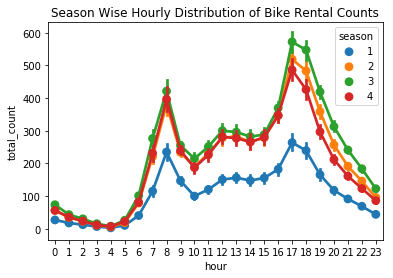

In [37]:
fig, ax = plt.subplots()
sns.pointplot(data = stats[['hour', 'total_count', 'season']], x= 'hour', y = 'total_count', hue = 'season', ax= ax)
ax.set(title = "Season Wise Hourly Distribution of Bike Rental Counts")

<B> Above graph shows similar trends for all seasons with counts peaking in the morning between 
7 -9 AM and in the evening between 4-6 PM for the reason those are business hours. The counts are 
lowest for spring season while highest foor Fall across 24 hours </B>

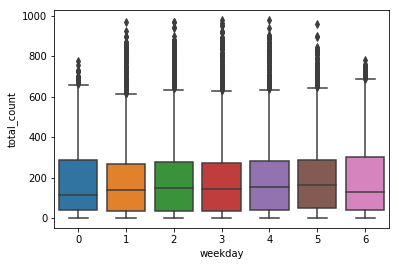

In [38]:
vis2 = sns.boxplot(data=stats, x='weekday', y='total_count')

<B> Rental Duration Variation Across a Quarter

[Text(0.5,1,u'Month Wise Hourly Distribution of Bike Rental Counts')]

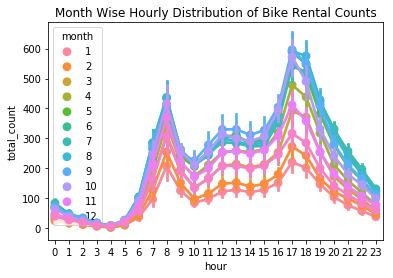

In [39]:
fig, ax = plt.subplots()
sns.pointplot(data = stats[['hour', 'total_count', 'month']], x= 'hour', y = 'total_count', hue = 'month', ax= ax)
ax.set(title = "Month Wise Hourly Distribution of Bike Rental Counts")

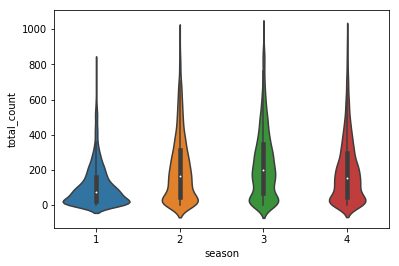

In [40]:
z = sns.violinplot(data=stats, x='season', y= 'total_count')

<B> By above plot, spring season is when higher probability 
that members of the population will take on the same as median value of
population count i.e. ~150. Rest all seasons show skinny distribution across

<B> Finding Outliers in the Dataset by User Type, Temperature and Windspeed using Box Plots

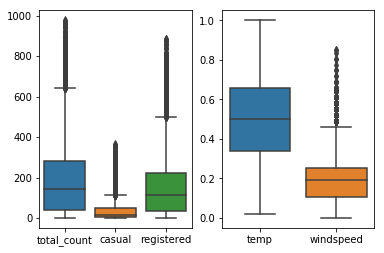

In [57]:
fig, (ax1,ax2) = plt.subplots(ncols = 2)
sns.boxplot(data = stats[['total_count', 'casual', 'registered']], ax = ax1)
sns.boxplot(data = stats[['temp', 'windspeed']], ax = ax2)

<B> The total, casual & registered type users show sizeable number of outlier values, 
however casual show lower numbers though. For weather attributes 
of temperature and wind speed, we see outliers only in the case of windspeed.

TypeError: Categorical is not ordered for operation min
you can use .as_ordered() to change the Categorical to an ordered one


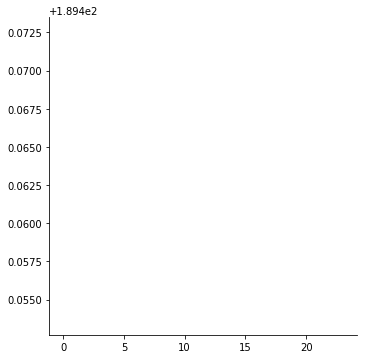